In [9]:
df2 = df.set_index(['userId','word'])
df2.sort_index(inplace=True)
qgrid.show_grid(df2, column_options = { 'editable': False })

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [184]:
from gorani.booky.book import Book, read_epub
import pandas as pd

In [185]:
from metaflow import Flow

In [188]:
run = Flow('PreprocessPaginate').latest_successful_run

In [236]:
signals_df = run.data.signals_df

In [239]:
df = signals_df.query('signal == 0.0').groupby(['userId','session','word'])["time"].count().reset_index(name="count")
qgrid.show_grid(df, column_options = { 'editable': False })

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [131]:
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("RdBu_r", 7))

In [159]:
df = pd.DataFrame([{'a': [1,2,3]}])
df.apply(lambda x: print(x.__class__))

<class 'pandas.core.series.Series'>


a    None
dtype: object

In [158]:
import pandera as pa

def pandas_validate(**kwargs):
    targets = kwargs
    class Wrapper:
        def __init__(self, fn):
            self.fn = fn

        def __set_name__(self, owner, name):
            self.owner = owner

        def __call__(self, *args, **kwargs):
            out = self.fn(self.owner, *args, **kwargs)
            for target in targets.items():
                df = getattr(self.owner, target[0])
                setattr(self.owner, target[0], target[1].validate(df))
            return out

    return Wrapper

class A:
    hi = 10
    @pandas_validate(
        df = pa.DataFrameSchema({
            "time": pa.Column(pa.String),
        })
    )
    def hello(self):
        self.df = pd.DataFrame([{'time2': 'hello'}])
        print('hi')

a = A()
a.hello()

hi


SchemaError: column 'time' not in dataframe
   time2
0  hello

In [132]:
import qgrid

In [135]:
df = run.data.signals_df

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269779 entries, 0 to 2492
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   word     269779 non-null  object 
 1   signal   269779 non-null  float64
 2   userId   269779 non-null  object 
 3   cheat    269779 non-null  bool   
 4   session  269779 non-null  int64  
 5   time     269779 non-null  int64  
 6   eltime   269779 non-null  float64
 7   wpm      269779 non-null  float64
 8   i        269779 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(2)
memory usage: 18.8+ MB


In [101]:
df2 = df.set_index(['userId','word'])
df2.sort_index(inplace=True)
qgrid.show_grid(df2, column_options = { 'editable': False })

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [57]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 


KeyboardInterrupt: 

In [59]:
words = df['word'].unique()
vector_list = [model[word] for word in words if word in model.vocab]
words_filtered = [word for word in words if word in model.vocab]
word_vec_zip = zip(words_filtered, vector_list)
word_vec_dict = dict(word_vec_zip)
df2 = pd.DataFrame.from_dict(word_vec_dict, orient='index')


In [60]:
raw_df = df[['signal', 'word', 'eltime', 'wpm', 'cheat']].copy()
raw_df['cheat'] = raw_df['cheat'].map(lambda x: 1 if x else 0)

In [65]:
data_df = raw_df.set_index('word').join(df2, how='right').reset_index()

In [93]:
df.groupby('word').mean()['signal'].describe()

count    7335.000000
mean        0.893181
std         0.245900
min         0.000000
25%         0.944444
50%         1.000000
75%         1.000000
max         1.000000
Name: signal, dtype: float64

In [77]:
y = data_df.iloc[:10000, 1]
x = data_df.iloc[:10000, 2:]

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)


In [87]:
model2 = AdaBoostClassifier(n_estimators=800, random_state = 1)
model2.fit(x_train, y_train)

TypeError: fit() got an unexpected keyword argument 'n_jobs'

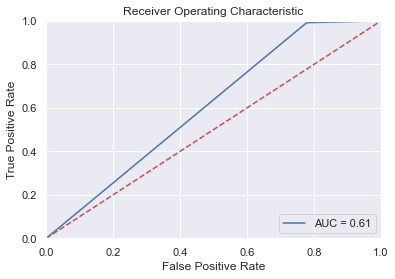

In [83]:
test_pred = model2.predict(x_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score, recall_score, accuracy_score
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, test_pred)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])    
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
pd.get_dummies(df['word'])

,','let,'poison','such,'tis,-,a,abandoned,abdomen,ability,...,your,yours,yourself,yut,zandvoort,zeal,zealand,zest,zig-zag,zusje
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
eltimes['cheat'] = eltimes['eltime'].map(lambda x: x <= 665)

In [122]:
df = run.data.pages
df = df.sort_values(['time'])

In [123]:
import numpy as np
import pandas as pd

In [124]:
df = df.set_index('userId').join(eltimes[['cheat']])

In [126]:
df['i'] = np.arange(len(df))
df['signalWord'] = df.apply(lambda x: [[x['words'][i].lower(), 0 if (i in x['unknownIndices']) or (x['words'][i].lower() in [y.lower() for y in x['unknownWords']]) else 1] for i in range(len(x['words']))], axis = 1)

In [133]:
def handle(value):
    words = []
    knows = []
    times = []
    for x, t in zip(value['signalWord'], value['time']):
        for y in x:
            if len(y) != 2:
                continue    
            words.append(y[0])
            knows.append(y[1])
            times.append(t)
    return pd.DataFrame({'word': words, 'known': knows, 'time': times}).reset_index()
df3 = df.groupby(['userId', 'cheat']).apply(handle).reset_index(level=2, drop=True).reset_index()
df3.set_index(['userId', 'cheat', 'word'], inplace=True)
df3 = df3.sort_values(['time'])

In [217]:
def retention(df):
    count = 0
    start = 0
    total = 0
    days = []
    maxDay = 0
    
    for t, k in zip(df['time'], df['known']):
        if start == 0:
            start = t
        dur = t - start
        total += k
        count += 1
        tmp = int(dur/(60*60))
        days.append({'day': tmp, 'known': k})
        if maxDay < tmp:
            maxDay = tmp
    df = pd.DataFrame(days).groupby('day').mean().reset_index()
    if df.size >=2:
        first = df.iloc[0]['known']
        last = df.iloc[-1]['known']
    else:
        first = np.nan
        last = np.nan
    df = df[['day','known']].T.to_dict().values()
    return pd.Series({'count': count, 'days': maxDay + 1, 'avg': total/count, 'first': first, 'last': last, 'df': df})

df4 = df3.groupby(['userId','cheat', 'word']).apply(retention)

In [218]:
df4['known'] = df4['df'].map(lambda x: [y['known'] for y in x])
df4['day'] = df4['df'].map(lambda x: [y['day'] for y in x])

In [219]:
def unnesting(df, explode, axis):
    if axis==1:
        idx = df.index.repeat(df[explode[0]].str.len())
        df1 = pd.concat([
            pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
        df1.index = idx

        return df1.join(df.drop(explode, 1), how='left')
    else :
        df1 = pd.concat([
                         pd.DataFrame(df[x].tolist(), index=df.index).add_prefix(x) for x in explode], axis=1)
        return df1.join(df.drop(explode, 1), how='left')

In [220]:
df5 = unnesting(df4[['known','day','first', 'count']],['known','day'], axis=1)
df6 = df5.query('cheat != True and count < 20')

In [ ]:


km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,
                      random_state=0).fit(X)


In [12]:

def parallel_coordinates(frame, value_column, class_column, x_column, colormap=None,
                     **kwds):
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    from scipy.interpolate import splrep, splev, interp1d
    n = len(frame)
    
    if isinstance(class_column, list):
        frame['class'] = frame.apply(lambda x: '*'.join([x[cla] for cla in class_column]), axis=1)
        frame['class'], uniques = pd.factorize(frame['class'], sort=True)
        class_col = frame['class']
        class_column = 'class'
    else:
        frame[class_column], uniques = pd.factorize(frame[class_column], sort=True)
        class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)
    
    value_col = frame[value_column]
    value_min = np.amin(value_col)
    value_max = np.amax(value_col)
    
    x_col = frame[x_column]
    x_min = np.amin(x_col)
    x_max = np.amax(x_col)

    used_legends = set([])

    fig = plt.figure()
    ax = plt.gca()

    Colorm = plt.get_cmap(colormap)

    for i in range(class_max):
        df = frame.loc[frame[class_column] == i].sort_values([x_column])
        x = df[x_column].reset_index(drop=True)
        y = df[value_column].reset_index(drop=True)
        if x.size <= 2:
            pass
        elif y[x.size-1] > 0.5:
            ax.plot(x, y, color='green', alpha=0.05)
        else:
            ax.plot(x, y, color='red', alpha=0.05)  
    
    ax.legend(loc='upper right')
    ax.grid()
    
    return fig

In [13]:
parallel_coordinates(df6.query('day < 50').reset_index(), 'known', ['word', 'userId'], 'day')

NameError: name 'df6' is not defined